# Matrix Utilities and Systolic Array Demo

This notebook demonstrates the functionality of the matrix utilities and systolic array simulation.


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from hardware_accelerators.rtllib.matrix_utils import (
    chunk_matrices,
    compute_matrix_multiply,
    simulate_systolic_multiply,
    visualize_matrix_chunks,
    validate_matrix_multiply
)

## 1. Basic Matrix Multiplication Example

Let's start with a simple example using small matrices to understand how the chunking works.


Visualizing matrix chunking:


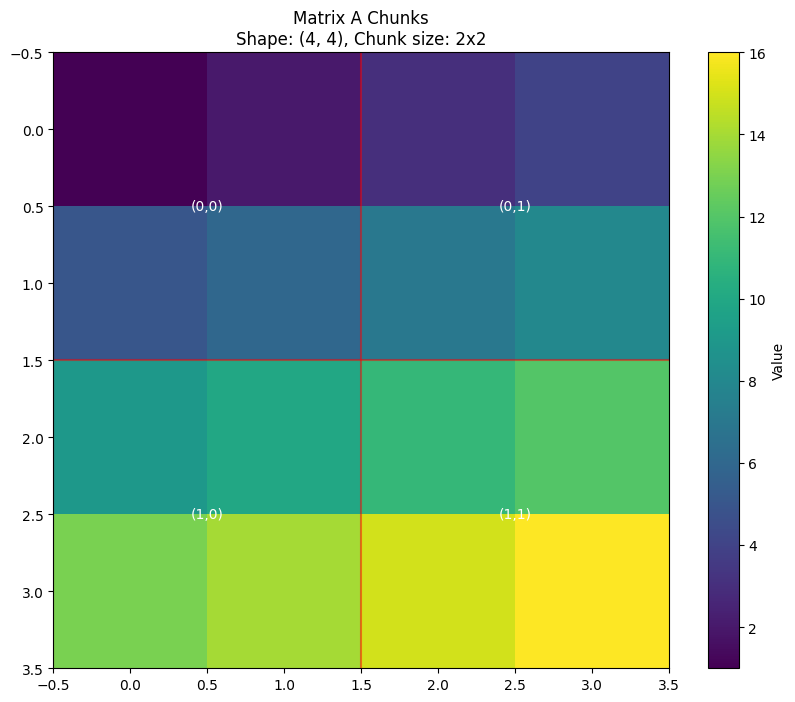

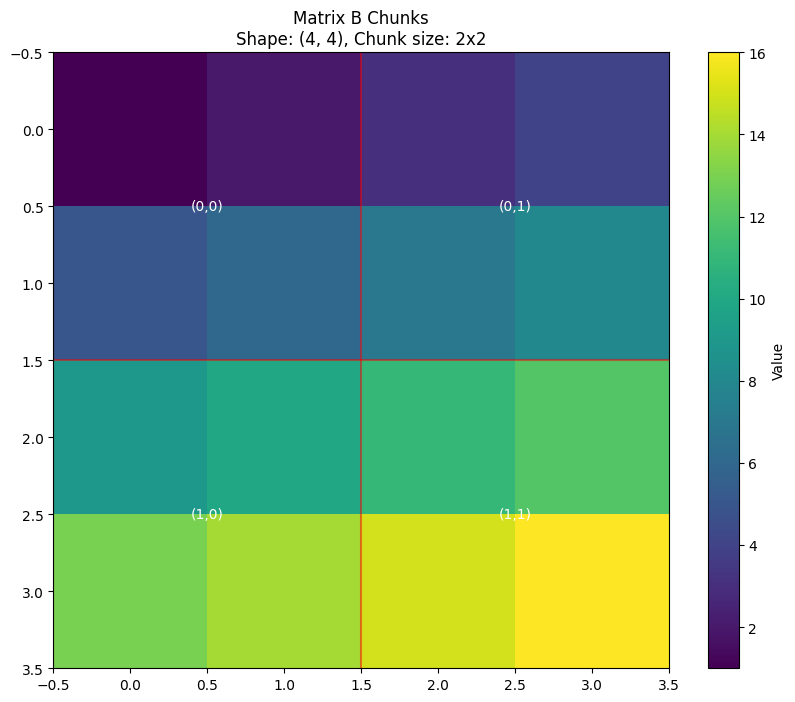

In [2]:
# Create sample matrices
matrix_a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

matrix_b = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

# Visualize how matrices are chunked with 2x2 systolic array
chunk_size = 2
print("Visualizing matrix chunking:")
visualize_matrix_chunks(matrix_a, chunk_size, "Matrix A Chunks")
visualize_matrix_chunks(matrix_b, chunk_size, "Matrix B Chunks")

## 2. Compare Results with NumPy


In [3]:
# Compute using our systolic implementation
systolic_result = compute_matrix_multiply(matrix_a, matrix_b, chunk_size, simulate_systolic_multiply)

# Compare with numpy
numpy_result = np.dot(matrix_a, matrix_b)

print("Systolic Array Result:")
print(systolic_result)
print("\nNumPy Result:")
print(numpy_result)
print("\nResults match:", np.allclose(systolic_result, numpy_result))

Systolic Array Result:
[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]

NumPy Result:
[[ 90 100 110 120]
 [202 228 254 280]
 [314 356 398 440]
 [426 484 542 600]]

Results match: True


## 3. Exploring Different Matrix Sizes

Let's test with matrices that aren't perfectly divisible by the chunk size.


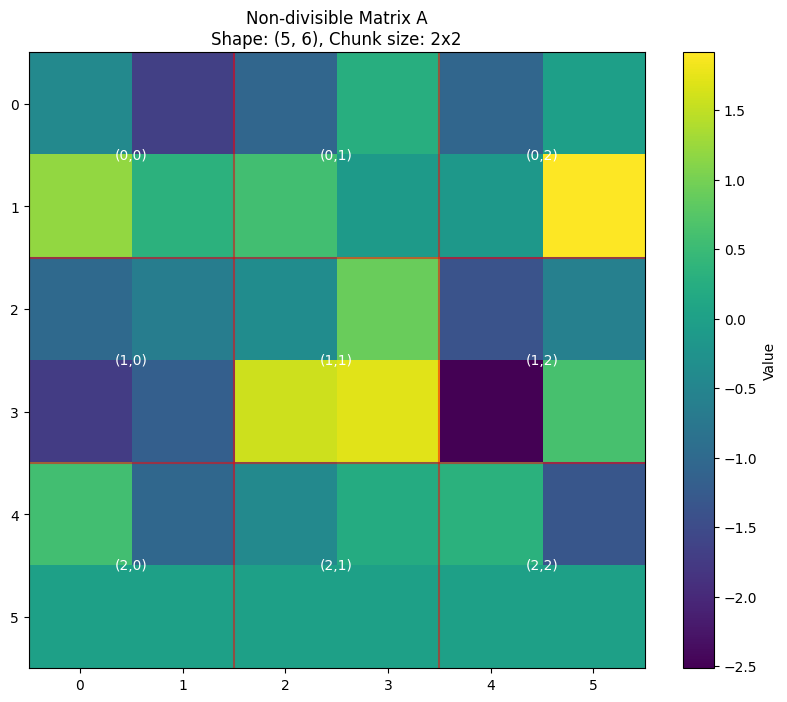

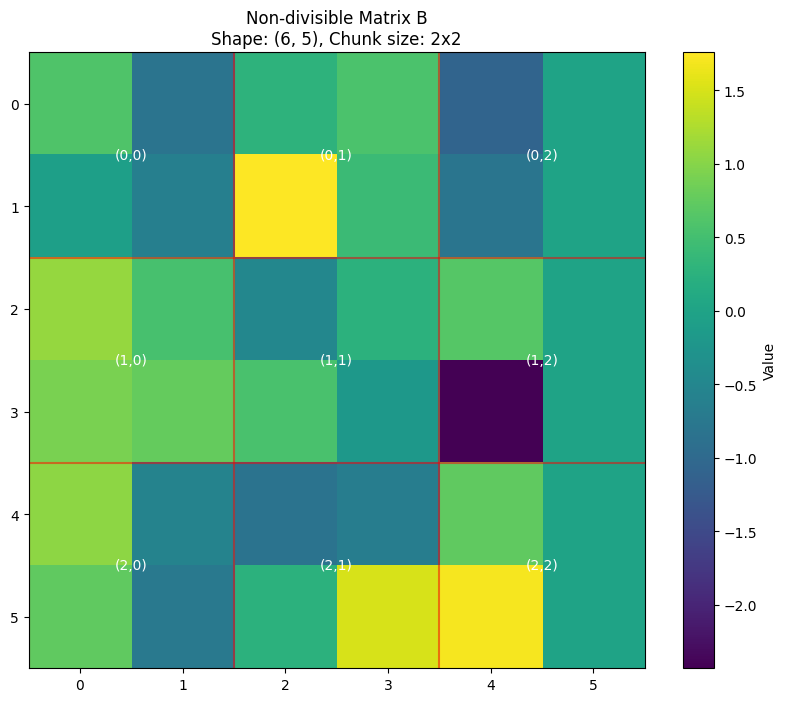

Matrix A shape: (5, 6)
Matrix B shape: (6, 5)
Chunk size: 2x2
Maximum absolute difference: 8.881784197001252e-16
Validation passed


True

In [4]:
# Create matrices with dimensions not divisible by chunk size
odd_matrix_a = np.random.randn(5, 6)
odd_matrix_b = np.random.randn(6, 5)

# Visualize chunking
chunk_size = 2
visualize_matrix_chunks(odd_matrix_a, chunk_size, "Non-divisible Matrix A")
visualize_matrix_chunks(odd_matrix_b, chunk_size, "Non-divisible Matrix B")

# Validate results
validate_matrix_multiply(odd_matrix_a, odd_matrix_b, chunk_size, simulate_systolic_multiply)

## 4. Performance Testing

Let's measure the performance with different matrix and chunk sizes.


In [5]:
import time

def benchmark_multiply(matrix_size, chunk_size):
    A = np.random.randn(matrix_size, matrix_size)
    B = np.random.randn(matrix_size, matrix_size)
    
    # Time systolic implementation
    start = time.time()
    systolic_result = compute_matrix_multiply(A, B, chunk_size, simulate_systolic_multiply)
    systolic_time = time.time() - start
    
    # Time numpy implementation
    start = time.time()
    numpy_result = np.dot(A, B)
    numpy_time = time.time() - start
    
    return systolic_time, numpy_time

# Test different sizes
sizes = [(8, 2), (16, 4), (32, 8)]
results = []

for matrix_size, chunk_size in sizes:
    systolic_time, numpy_time = benchmark_multiply(matrix_size, chunk_size)
    results.append({
        'matrix_size': matrix_size,
        'chunk_size': chunk_size,
        'systolic_time': systolic_time,
        'numpy_time': numpy_time
    })
    print(f"Matrix size: {matrix_size}x{matrix_size}, Chunk size: {chunk_size}x{chunk_size}")
    print(f"Systolic time: {systolic_time:.4f}s")
    print(f"NumPy time: {numpy_time:.4f}s\n")

Matrix size: 8x8, Chunk size: 2x2
Systolic time: 0.0015s
NumPy time: 0.0000s

Matrix size: 16x16, Chunk size: 4x4
Systolic time: 0.0000s
NumPy time: 0.0000s

Matrix size: 32x32, Chunk size: 8x8
Systolic time: 0.0010s
NumPy time: 0.0000s



## 5. Visualizing the Computation Process

Let's create a visualization of how the partial results are accumulated.


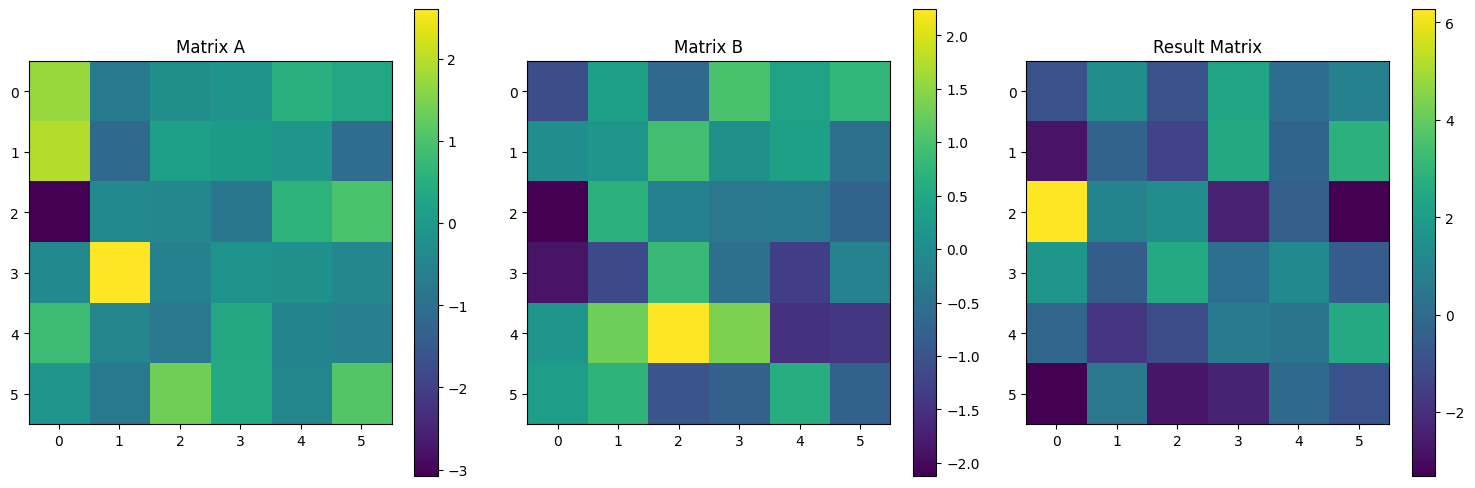

In [6]:
def visualize_partial_results(matrix_a, matrix_b, chunk_size):
    plt.figure(figsize=(15, 5))
    
    # Plot original matrices
    plt.subplot(131)
    plt.imshow(matrix_a, cmap='viridis')
    plt.title('Matrix A')
    plt.colorbar()
    
    plt.subplot(132)
    plt.imshow(matrix_b, cmap='viridis')
    plt.title('Matrix B')
    plt.colorbar()
    
    # Compute and plot result
    result = compute_matrix_multiply(matrix_a, matrix_b, chunk_size, simulate_systolic_multiply)
    
    plt.subplot(133)
    plt.imshow(result, cmap='viridis')
    plt.title('Result Matrix')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

# Create example matrices
matrix_size = 6
chunk_size = 2
example_a = np.random.randn(matrix_size, matrix_size)
example_b = np.random.randn(matrix_size, matrix_size)

visualize_partial_results(example_a, example_b, chunk_size)